In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

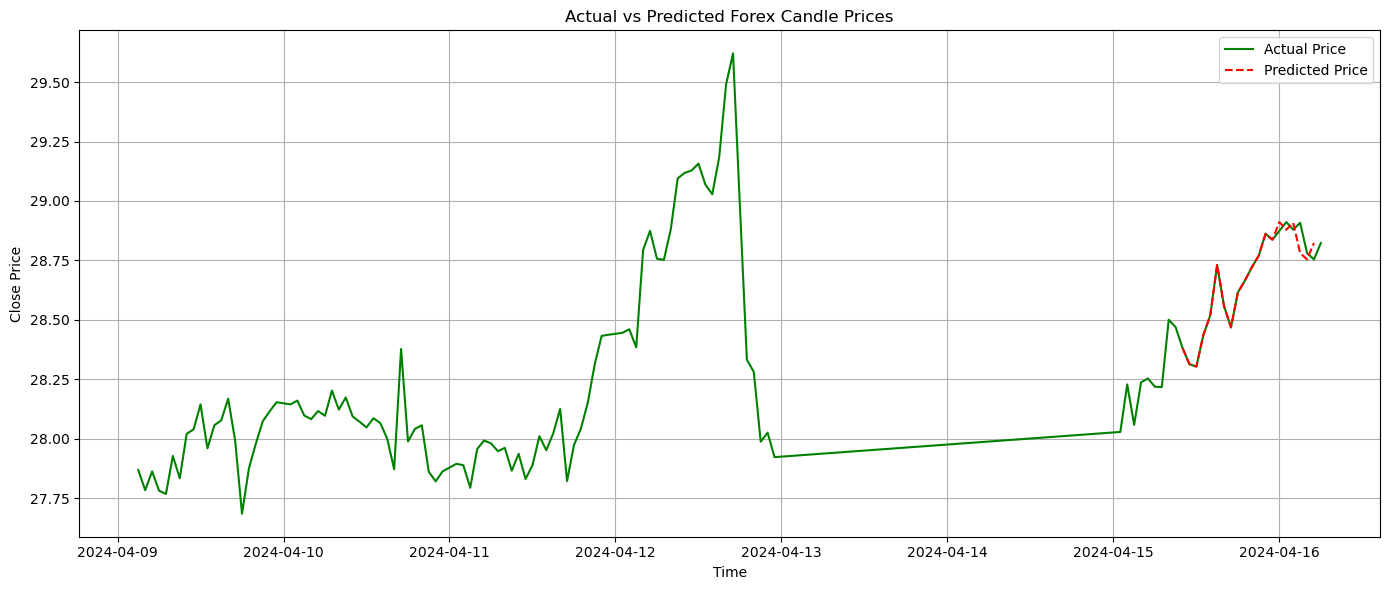

In [5]:
# 📌 PARAMETERS — easy to configure
csv1_path = '111.csv'   # Historical candles (actual)
csv2_path = '222.csv'   # Predicted candles (future)
csv3_path = '333.csv'   # Actual future candles
plot_title = 'Actual vs Predicted Forex Candle Prices'
historical_color = 'black'
actual_future_color = 'green'
predicted_color = 'red'
output_plot_path = 'prediction_vs_actual.png'  # Set None if you don't want to save

def load_csv_closing_prices(csv_path):
    df = pd.read_csv(csv_path, sep='\t' if '\t' in open(csv_path).readline() else ',')
    df['DATETIME'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%Y.%m.%d %H:%M:%S')
    return df[['DATETIME', '<CLOSE>']].reset_index(drop=True)

def plot_price_series(historical_df, actual_future_df, predicted_df, title, colors, output_path=None):
    # Combine actual data
    combined_actual = pd.concat([historical_df, actual_future_df], ignore_index=True)

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(combined_actual['DATETIME'], combined_actual['<CLOSE>'], label='Actual Price', color=colors['actual'])

    # Overlay predicted prices
    # For plotting, we need predicted timestamps to follow historical + actual
    last_actual_time = historical_df['DATETIME'].iloc[-1]
    freq = (historical_df['DATETIME'].iloc[1] - historical_df['DATETIME'].iloc[0])  # assume constant interval
    predicted_times = [last_actual_time + freq * (i+1) for i in range(len(predicted_df))]
    plt.plot(predicted_times, predicted_df['<CLOSE>'], label='Predicted Price', color=colors['predicted'], linestyle='--')

    # Decorations
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save if needed
    if output_path:
        plt.savefig(output_path)
    plt.show()

# ==============================
# 🚀 MAIN EXECUTION
# ==============================
historical_df = load_csv_closing_prices(csv1_path)
predicted_df = load_csv_closing_prices(csv2_path)
actual_future_df = load_csv_closing_prices(csv3_path)

plot_price_series(
    historical_df=historical_df,
    actual_future_df=actual_future_df,
    predicted_df=predicted_df,
    title=plot_title,
    colors={'actual': actual_future_color, 'predicted': predicted_color},
    output_path=output_plot_path
)
